In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
candidates_df = pd.read_csv('candidates_with_phase.csv')

In [4]:
candidates_df.head(2)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39,"Dollygunj Village, Port Blair Tehsil, South An...","27th March, 2024",Accepted,S B GURUNG,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024


In [5]:
result_data_df = pd.read_csv('results_2024.csv')

In [6]:
result_data_df.head(2)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62


In [7]:
results_df = pd.read_csv('results_2024_winners.csv')

In [8]:
results_df.head(2)

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared


## Analyze the gender distribution of candidates across all constituencies.Determine the success rate (percentage of winning candidates) for male and female candidates separately.


In [9]:
candidates_df.head(2)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39,"Dollygunj Village, Port Blair Tehsil, South An...","27th March, 2024",Accepted,S B GURUNG,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024


In [10]:
results_df.head(1)

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared


In [11]:
total_gender_candidate = candidates_df.groupby('Gender').size().reset_index(name='total_candidate_contested')
total_gender_candidate

,Gender,total_candidate_contested
0,female,801
1,male,7634
2,third,6


In [12]:
gender_merged = pd.merge(candidates_df,results_df,left_on='Candidate Name',right_on ='Winning Candidate')
gender_merged.head(1)

,State_x,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,...,Polling Date,State_y,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Bharatiya Janata Party,BISHNU PADA RAY,male,73,"ROUND BASTI, ABERDEEN VILLAGE, PORT BLAIR, SOU...","22nd March, 2024",Accepted,...,19-04-2024,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared


In [13]:
gender_wise_won = gender_merged.groupby('Gender').size().reset_index(name='winning_candidate')
gender_wise_won.head(3)

,Gender,winning_candidate
0,female,75
1,male,501


In [14]:
final_gender_merge = pd.merge(total_gender_candidate,gender_wise_won,on="Gender")
final_gender_merge

,Gender,total_candidate_contested,winning_candidate
0,female,801,75
1,male,7634,501


In [15]:
final_gender_merge['succes_rate'] =(final_gender_merge['winning_candidate'] / final_gender_merge['total_candidate_contested'])*100
final_gender_merge

,Gender,total_candidate_contested,winning_candidate,succes_rate
0,female,801,75,9.363296
1,male,7634,501,6.562746


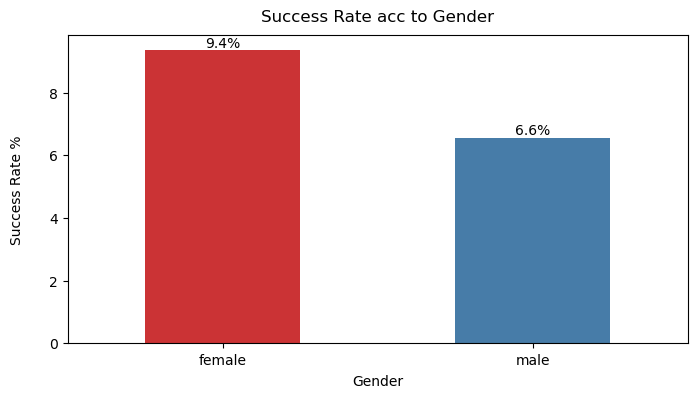

In [16]:
# Here's The Visualization of the Data.

plt.figure(figsize=(8,4))

ax1 = sns.barplot(data=final_gender_merge,x='Gender',y='succes_rate',width=0.5,palette='Set1')

plt.xlabel('Gender',labelpad=5)
plt.ylabel('Success Rate %',labelpad=18)
plt.title('Success Rate acc to Gender',pad=10)

ax1.bar_label(ax1.containers[0],fmt='%.1f%%',padding=0)  # Adjust the format as needed

plt.show()


## Calculate the total number of seats won by each political party.

In [17]:
results_df.head(3)

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
2,Andhra Pradesh,19,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared


In [18]:
seats_won_data = results_df.groupby('Winning Party')['PC No'].count().to_frame('Seats Won').reset_index().sort_values(by='Seats Won',ascending=False).head(10)
seats_won_data

,Winning Party,Seats Won
8,Bharatiya Janata Party,240
15,Indian National Congress,99
31,Samajwadi Party,37
4,All India Trinamool Congress,29
12,Dravida Munnetra Kazhagam,22
36,Telugu Desam,16
20,Janata Dal (United),12
34,Shiv Sena (Uddhav Balasaheb Thackrey),9
26,Nationalist Congress Party – Sharadchandra Pawar,8
33,Shiv Sena,7


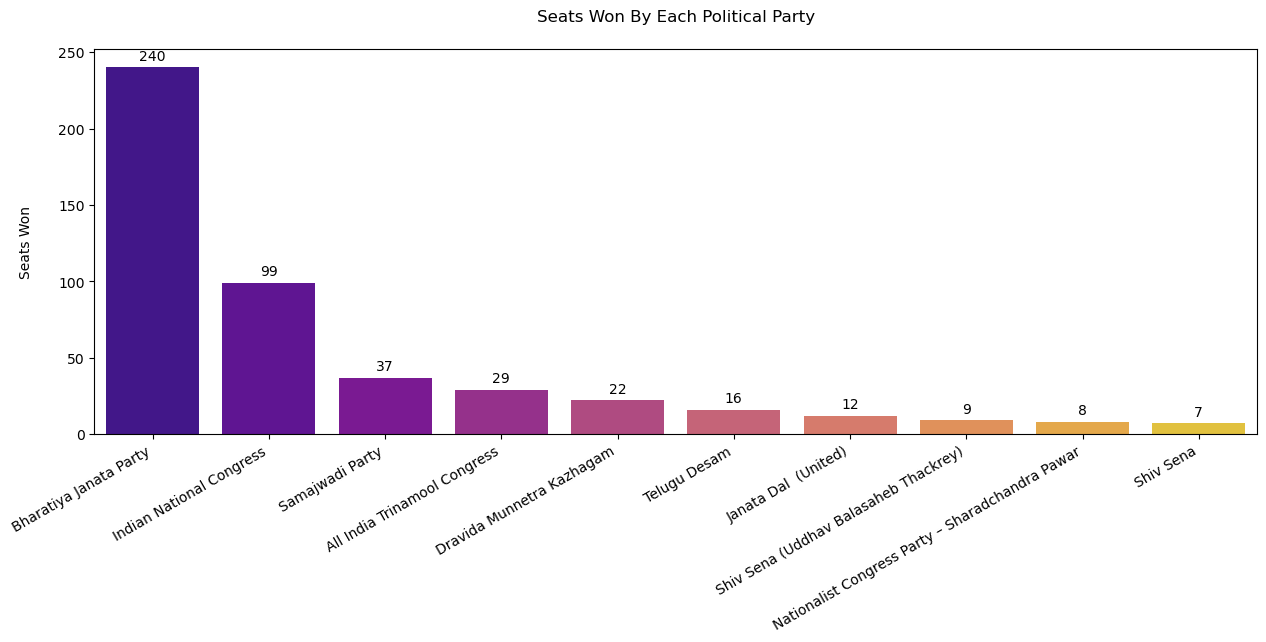

In [19]:
# Here's The Visualization of the Data.

plt.figure(figsize=(15,5))

ax2 = sns.barplot(data=seats_won_data,x='Winning Party',y='Seats Won',palette='plasma')

plt.xlabel('')
plt.ylabel('Seats Won',labelpad=18)
plt.title('Seats Won By Each Political Party', pad=20)

plt.xticks(rotation = 30,ha='right')

ax2.bar_label(ax2.containers[0],padding=3)  # Adjust the format as needed

plt.show()


## Determine the vote share percentage for each political party at the National level.


In [20]:
result_data_df.head(2)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62


In [21]:
# Replace non-numeric values with NaN
result_data_df['Total Votes'] = pd.to_numeric(result_data_df['Total Votes'], errors='coerce')

# Fill NaN values with 0 (or handle them as needed)
result_data_df['Total Votes'] = result_data_df['Total Votes'].fillna(0)

In [22]:
result_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         8902 non-null   object 
 1   PC No         8902 non-null   int64  
 2   PC Name       8902 non-null   object 
 3   Sl no         8902 non-null   int64  
 4   Candidate     8902 non-null   object 
 5   Party         8902 non-null   object 
 6   EVM Votes     8902 non-null   object 
 7   Postal Votes  8902 non-null   object 
 8   Total Votes   8902 non-null   float64
 9   Vote Share    8902 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 695.6+ KB


In [23]:
# THIS CALCULATES THE VOTES EACH PARTY GOT .
party_votes = result_data_df.groupby('Party')['Total Votes'].sum()
party_votes.head(3)

Party
AARAKSHAN VIRODHI PARTY      1444.0
AJSU Party                 458677.0
Aadarsh Mithila Party       29550.0
Name: Total Votes, dtype: float64

In [24]:
# THIS IS TOTAL VOTES.
total_votes = result_data_df['Total Votes'].sum()
total_votes

645363445.0

In [25]:
vote_share_percentage = (party_votes / total_votes) * 100
vote_share_percentage.reset_index().sort_values(by='Total Votes',ascending = False).head(18)

,Party,Total Votes
158,Bharatiya Janata Party,36.564503
289,Indian National Congress,21.191015
617,Samajwadi Party,4.578719
69,All India Trinamool Congress,4.371706
282,Independent,2.765022
744,Yuvajana Sramika Rythu Congress Party,2.063340
121,Bahujan Samaj Party,2.038203
698,Telugu Desam,1.979547
250,Dravida Munnetra Kazhagam,1.821409
227,Communist Party of India (Marxist),1.757545


In [26]:
# vote_share_percentage is a series Object we will convert it into a dataframe by using reset_index() while plotting

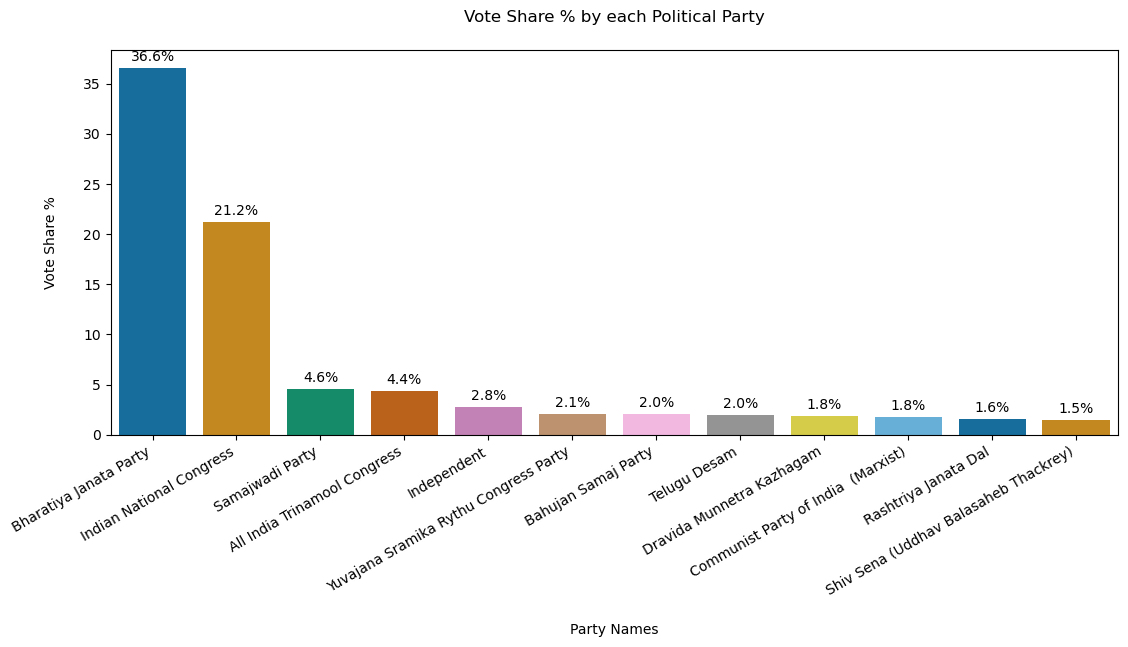

In [27]:
# Here's The Visualization of the Data.

plt.figure(figsize=(13,5))

ax1 = sns.barplot(data=vote_share_percentage.reset_index().sort_values(by='Total Votes',ascending=False).head(12),x='Party',y='Total Votes',palette='colorblind')

plt.xlabel('Party Names',labelpad=18)
plt.ylabel('Vote Share %',labelpad=18)
plt.title('Vote Share % by each Political Party', pad=20)

plt.xticks(rotation = 30,ha='right')

ax1.bar_label(ax1.containers[0],fmt='%.1f%%',padding=3)  # Adjust the format as needed

plt.show()

##  Age Analysis:



## Group candidates by age brackets (e.g., 18-30, 31-45, 46-60, 61+) (Calculate the success rate for each age bracket)

In [28]:
results_df.head(1)

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared


In [29]:
candidates_df.head(1)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024


In [30]:
candidates_df['Age'].unique()

array([42, 39, 36, 56, 58, 50, 48, 35, 60, 64, 73, 53, 32, 47, 43, 41, 31,
       28, 45, 30, 59, 38, 37, 34, 29, 49, 66, 40, 61, 62, 33, 46, 69, 55,
       44, 54, 26, 52, 57, 51, 70, 25, 63, 65, 71, 67, 68, 76, 27, 74, 75,
       72, 78, 77, 83, 81, 79, 87, 84, 82, 85, 80, 88], dtype=int64)

In [31]:
# Group candidates by age brackets (e.g., 18-30, 31-45, 46-60, 61+).

In [32]:
candidates_df['Age'].dtypes

dtype('int64')

In [33]:
def age_check(a):
    if a >= 18 and a <= 30:
        return '18-31'
    elif a >= 31 and a <= 45:
        return '30-45'
    elif a >=46 and a <= 60:
        return '46-60'
    else :
        return '60+'

In [34]:
candidates_df['age_bracket'] = candidates_df['Age'].apply(age_check)

In [35]:
candidates_df.head(2)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date,age_bracket
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024,30-45
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39,"Dollygunj Village, Port Blair Tehsil, South An...","27th March, 2024",Accepted,S B GURUNG,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024,30-45


In [36]:
age_bracket_merge = pd.merge(results_df,candidates_df,left_on = "Winning Candidate",right_on = "Candidate Name")
age_bracket_merge.head(1)

,State_x,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status,State_y,...,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date,age_bracket
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared,Andhra Pradesh,...,male,33,"D.No. 12-2-33/2 , NVR Nagar, Housing Board Col...","24th April, 2024",Accepted,MOHANA CHANDRA BALAYOGI,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024,30-45


In [37]:
candidates_df.head(1)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date,age_bracket
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024,30-45


In [38]:
# This will give us count of candidtaes acc to each age_bracket.
total_candidates = candidates_df.groupby('age_bracket').size().reset_index(name='total_candidates')
total_candidates

,age_bracket,total_candidates
0,18-31,545
1,30-45,3326
2,46-60,3146
3,60+,1424


In [39]:
# This will give us the count of winning candidates acc to each age_bracket . we did this calculation on merged_df because it consists the data of only winning candidates
grouped_winning_candidates = age_bracket_merge.groupby('age_bracket').size().reset_index(name='winnning candidates')
grouped_winning_candidates

,age_bracket,winnning candidates
0,18-31,10
1,30-45,111
2,46-60,246
3,60+,209


In [40]:
final_success_df = pd.merge(total_candidates,grouped_winning_candidates,on='age_bracket')

In [41]:
final_success_df ['succes_rate'] = (final_success_df['winnning candidates'] / final_success_df['total_candidates']) * 100
final_success_df

,age_bracket,total_candidates,winnning candidates,succes_rate
0,18-31,545,10,1.834862
1,30-45,3326,111,3.337342
2,46-60,3146,246,7.819453
3,60+,1424,209,14.676966


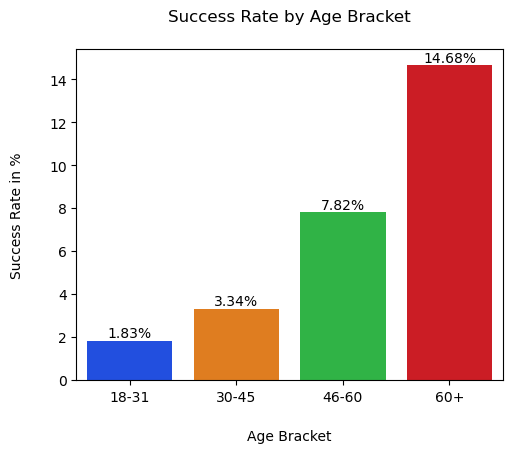

In [42]:
# Here's The Visualization of the Data.

plt.figure(figsize=(5.5,4.3))

ax = sns.barplot(data=final_success_df,x='age_bracket',y='succes_rate',palette='bright')

plt.xlabel('Age Bracket',labelpad=18)
plt.ylabel('Success Rate in %',labelpad=18)
plt.title('Success Rate by Age Bracket', pad=20)


ax.bar_label(ax.containers[0],fmt='%.2f%%')  # Adjust the format as needed

plt.show()

In [43]:
candidates_df.head(1)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date,age_bracket
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024,30-45


In [44]:
total_candidates

,age_bracket,total_candidates
0,18-31,545
1,30-45,3326
2,46-60,3146
3,60+,1424


In [45]:
grouped_winning_candidates

,age_bracket,winnning candidates
0,18-31,10
1,30-45,111
2,46-60,246
3,60+,209


In [46]:
result_data_df.head(2)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005.0,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425.0,36.62


In [47]:
result_data_df.groupby('Party')['Total Votes'].sum().reset_index().sort_values(by='Total Votes',ascending = False).query('Party =="Shiv Sena"')

,Party,Total Votes
656,Shiv Sena,7401447.0


In [48]:
result_data_df.head(2)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005.0,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425.0,36.62


In [69]:
aimim_data = result_data_df.query('Party == "All India Majlis-E-Ittehadul Muslimeen"')
aimim_data.head(2)

,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
689,Bihar,4,Sheohar,5,RANA RANJIT,All India Majlis-E-Ittehadul Muslimeen,11947,32,11979.0,1.13
720,Bihar,6,Madhubani,8,MD WAQUAR SIDDIQUI,All India Majlis-E-Ittehadul Muslimeen,4492,6,4498.0,0.44


In [49]:
results_df.head(2)

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared


In [110]:
aimim_merge = pd.merge(aimim_data,results_df,on='PC Name')
aimim_merge.head(3)

,State_x,PC No_x,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share,State_y,PC No_y,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Bihar,4,Sheohar,5,RANA RANJIT,All India Majlis-E-Ittehadul Muslimeen,11947,32,11979.0,1.13,Bihar,4,LOVELY ANAND,Janata Dal (United),RITU JAISWAL,Rashtriya Janata Dal,29143,Result Declared
1,Bihar,6,Madhubani,8,MD WAQUAR SIDDIQUI,All India Majlis-E-Ittehadul Muslimeen,4492,6,4498.0,0.44,Bihar,6,ASHOK KUMAR YADAV,Bharatiya Janata Party,MD ALI ASHRAF FATMI,Rashtriya Janata Dal,151945,Result Declared
2,Bihar,10,Kishanganj,3,AKHTARUL IMAN,All India Majlis-E-Ittehadul Muslimeen,309011,253,309264.0,26.87,Bihar,10,MOHAMMAD JAWED,Indian National Congress,MUJAHID ALAM,Janata Dal (United),59692,Result Declared


In [119]:
aimim_merge.drop(['Sl no','EVM Votes','Postal Votes','Vote Share','PC No_y'],inplace=True,axis=1)

In [120]:
aimim_merge

,State_x,PC No_x,PC Name,Candidate,Party,Total Votes,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes
0,Bihar,4,Sheohar,RANA RANJIT,All India Majlis-E-Ittehadul Muslimeen,11979.0,LOVELY ANAND,Janata Dal (United),RITU JAISWAL,Rashtriya Janata Dal,29143
1,Bihar,6,Madhubani,MD WAQUAR SIDDIQUI,All India Majlis-E-Ittehadul Muslimeen,4498.0,ASHOK KUMAR YADAV,Bharatiya Janata Party,MD ALI ASHRAF FATMI,Rashtriya Janata Dal,151945
2,Bihar,10,Kishanganj,AKHTARUL IMAN,All India Majlis-E-Ittehadul Muslimeen,309264.0,MOHAMMAD JAWED,Indian National Congress,MUJAHID ALAM,Janata Dal (United),59692
3,Bihar,15,Muzaffarpur,MOHAMMAD ANZARUL HASAN,All India Majlis-E-Ittehadul Muslimeen,4131.0,RAJ BHUSHAN CHOUDHARY,Bharatiya Janata Party,AJAY NISHAD,Indian National Congress,234927
4,Bihar,17,Gopalganj,DINANATH MANJHI,All India Majlis-E-Ittehadul Muslimeen,29992.0,DR. ALOK KUMAR SUMAN,Janata Dal (United),PREM NATH CHANCHAL ALIAS CHANCHAL PASWAN,Vikassheel Insaan Party,127180
5,Bihar,19,Maharajganj,AKHILESHWAR PRASAD SINGH,All India Majlis-E-Ittehadul Muslimeen,7767.0,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651
6,Bihar,19,Maharajganj,AKHILESHWAR PRASAD SINGH,All India Majlis-E-Ittehadul Muslimeen,7767.0,PANKAJ CHAUDHARY,Bharatiya Janata Party,VIRENDRA CHAUDHARY,Indian National Congress,35451
7,Bihar,31,Patliputra,MD FAROOQUE RAZA,All India Majlis-E-Ittehadul Muslimeen,4023.0,MISHA BHARTI,Rashtriya Janata Dal,RAM KRIPAL YADAV,Bharatiya Janata Party,85174
8,Bihar,35,Karakat,PRIYANKA PRASAD CHOUDHARY,All India Majlis-E-Ittehadul Muslimeen,11006.0,RAJA RAM SINGH,Communist Party of India (Marxist-Leninist) ...,PAWAN SINGH,Independent,105858
9,Maharashtra,19,Aurangabad,IMTIAZ JALEEL SYED,All India Majlis-E-Ittehadul Muslimeen,341480.0,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111


In [121]:
aimim_merge.tail(5)

,State_x,PC No_x,PC Name,Candidate,Party,Total Votes,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes
12,Maharashtra,29,Mumbai North Central,RAMZAN ALI CHAUDHARY,All India Majlis-E-Ittehadul Muslimeen,1531.0,GAIKWAD VARSHA EKNATH,Indian National Congress,ADV UJWAL NIKAM,Bharatiya Janata Party,16514
13,Maharashtra,34,Pune,ANIS ARASHID SUNDAKE,All India Majlis-E-Ittehadul Muslimeen,860.0,MURLIDHAR MOHOL,Bharatiya Janata Party,DHANGEKAR RAVINDRA HEMRAJ,Indian National Congress,123038
14,Maharashtra,40,Osmanabad,SIDDIK IBRAHIM BAUDIWALE ALIAS GOLABHAI,All India Majlis-E-Ittehadul Muslimeen,2060.0,OMPRAKASH BHUPALSINH ALIAS PAVAN RAJENIMBALKAR,Shiv Sena (Uddhav Balasaheb Thackrey),ARCHANA RANAJAGJITSINH PATIL,Nationalist Congress Party,329846
15,Jharkhand,1,Rajmahal,PAUL SOREN,All India Majlis-E-Ittehadul Muslimeen,7902.0,VIJAY KUMAR HANSDAK,Jharkhand Mukti Morcha,TALA MARANDI,Bharatiya Janata Party,178264
16,Telangana,9,Hyderabad,ASADUDDIN OWAISI,All India Majlis-E-Ittehadul Muslimeen,661981.0,ASADUDDIN OWAISI,All India Majlis-E-Ittehadul Muslimeen,MADHAVI LATHA KOMPELLA,Bharatiya Janata Party,338087


In [73]:
results_df.query

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
207,Maharashtra,23,Bhiwandi,BALYA MAMA - SURESH GOPINATH MHATRE,Nationalist Congress Party – Sharadchandra Pawar,KAPIL MORESHWAR PATIL,Bharatiya Janata Party,66121,Result Declared


In [52]:
candidates_df.head(1)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husband's Name,Photo Link,Phase,Polling Date,age_bracket
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024,30-45
